In [19]:
from src.basic import Problem
from src.qva import QVA_apply, QVA_optimize
import numpy as np
import matplotlib.pyplot as plt

In [20]:
cha_b = ['O1', 'O2', 'O3', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
bonds_b = [('O1', 'O2'), ('O1', 'C1'), ('O2', 'C6'), ('O3', 'C6'), ('O3', 'C6'), ('C1', 'C2'), ('C1', 'C3'), ('C1', 'C4'), ('C5', 'C6'), ('C5', 'C7'), ('C5', 'C8')]
hydrogen_b = [0, 0, 0, 0, 3, 3, 3, 1, 0, 3, 3]
cha_a = ['O1', 'C1', 'O2', 'C2']
bonds_a = [('O1', 'C1'), ('C1', 'O2'), ('C1', 'O2'), ('C1', 'C2')]
hydrogen_a = [1, 0, 0, 0]

cha_b = ['O1', 'C1', 'O2', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'Cl1', 'Cl2']
bonds_b = [('O1', 'C1'), ('C1', 'O2'), ('C1', 'O2'), ('C1', 'C2'), ('C2', 'C3'), ('C2', 'C7'), ('C2', 'C7'), ('C3', 'C4'), ('C3', 'C4'), ('C3', 'Cl1'), ('C4', 'C5'), ('C4', 'Cl2'), ('C5', 'C6'), ('C5', 'C6'), ('C6', 'C7')]
hydrogen_b = [1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]
cha_a = ['O1', 'C1', 'O2', 'C2']
bonds_a = [('O1', 'C1'), ('C1', 'O2'), ('C1', 'O2'), ('C1', 'C2')]
hydrogen_a = [1, 0, 0, 0]

problem = Problem.from_bonds(cha_a, cha_b, bonds_a, bonds_b, hydrogen_a, hydrogen_b)

x1, r1 = QVA_optimize(problem, x0=None, params={'lr':0.1, 'epochs':20, 'm0':20}, loss_func='w_avg')
np.savetxt("model/20_eg1.txt", x1)

------------------
Starting QVA optimization under the following param: 
{'device': 'CPU', 'silent': False, 'shots': 1000000, 'epochs': 20, 'lr': 0.1, 'm0': 20, 'l1': 2, 'l2': 2}
We are using 16 qubits, with N = 4 , M = 11
Building circuit...
Finished in 1080 ms
Running optimization...
Initial parameter x =  [4.75000000e-01 4.50000000e-01 4.25000000e-01 4.00000000e-01
 3.75000000e-01 3.50000000e-01 3.25000000e-01 3.00000000e-01
 2.75000000e-01 2.50000000e-01 2.25000000e-01 2.00000000e-01
 1.75000000e-01 1.50000000e-01 1.25000000e-01 1.00000000e-01
 7.50000000e-02 5.00000000e-02 2.50000000e-02 0.00000000e+00
 2.50000000e-02 5.00000000e-02 7.50000000e-02 1.00000000e-01
 1.25000000e-01 1.50000000e-01 1.75000000e-01 2.00000000e-01
 2.25000000e-01 2.50000000e-01 2.75000000e-01 3.00000000e-01
 3.25000000e-01 3.50000000e-01 3.75000000e-01 4.00000000e-01
 4.25000000e-01 4.50000000e-01 4.75000000e-01 5.00000000e-01
 1.56250000e-05 2.50000000e-04 1.26562500e-03 4.00000000e-03
 9.76562500e-03 2.0

In [21]:
x2, r2 = QVA_optimize(problem, x0=x1, params={'lr':0.1, 'epochs':20, 'm0':20}, loss_func='sol_prob')
np.savetxt("model/20_eg2.txt", x2)

------------------
Starting QVA optimization under the following param: 
{'device': 'CPU', 'silent': False, 'shots': 1000000, 'epochs': 20, 'lr': 0.1, 'm0': 20, 'l1': 2, 'l2': 2}
We are using 16 qubits, with N = 4 , M = 11
Building circuit...
Finished in 606 ms
Running optimization...
Initial parameter x =  [ 4.70231055e-01  4.29067431e-01  4.18825760e-01  4.14521137e-01
  3.89338134e-01  3.54063229e-01  3.19174696e-01  2.73054714e-01
  2.40018372e-01  2.00758051e-01  1.85962708e-01  1.75726224e-01
  1.55212899e-01  1.54763789e-01  1.42666458e-01  1.08017487e-01
  4.86774609e-02  2.86986675e-02  1.07568837e-02  2.14114149e-03
  1.44911415e-02  6.80334852e-02  9.63766927e-02  9.32142535e-02
  1.09388789e-01  1.26403190e-01  1.38984970e-01  1.52373351e-01
  1.66409536e-01  1.70794314e-01  1.88599431e-01  1.99755820e-01
  2.13016714e-01  2.80827335e-01  3.67378368e-01  4.19518893e-01
  4.31801901e-01  4.51416480e-01  4.67467821e-01  5.10400616e-01
 -1.36809809e-02 -7.21162891e-02 -8.51550

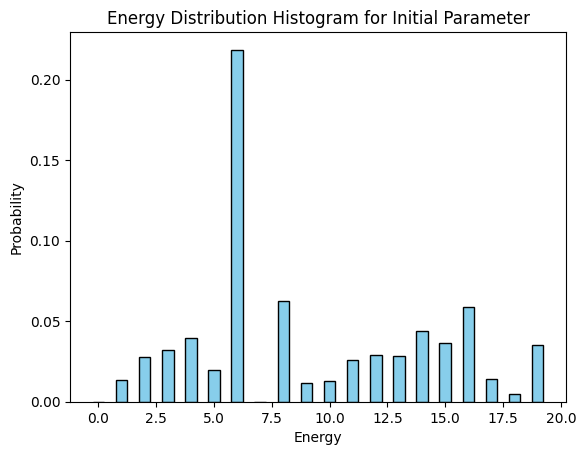

In [22]:
w_hist = r1[4][0]
ws = range(20)
freqs = np.zeros(20)
for w, freq in w_hist:
  w = int(w*9)
  if w < 20:
    freqs[w] += freq/1000000

plt.bar(ws, freqs, width=0.5, color='skyblue', edgecolor='black')
plt.title('Energy Distribution Histogram for Initial Parameter')
plt.xlabel('Energy')
plt.ylabel('Probability')
plt.show()

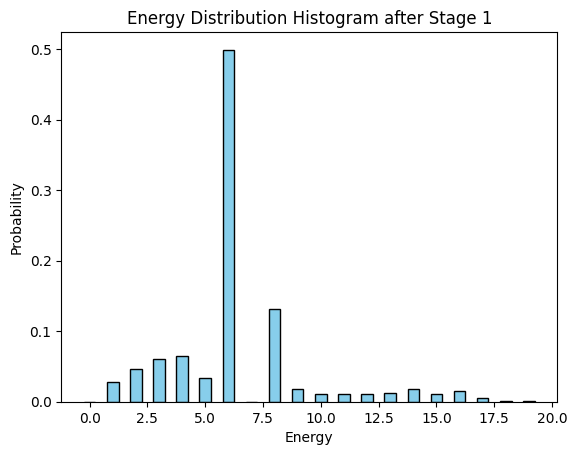

In [23]:
w_hist = r1[4][20]
ws = range(20)
freqs = np.zeros(20)
for w, freq in w_hist:
  w = int(w*9)
  if w < 20:
    freqs[w] += freq/1000000

plt.bar(ws, freqs, width=0.5, color='skyblue', edgecolor='black')
plt.title('Energy Distribution Histogram after Stage 1')
plt.xlabel('Energy')
plt.ylabel('Probability')
plt.show()

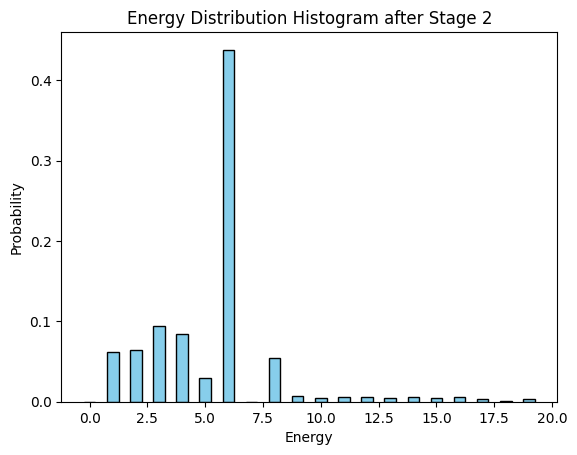

In [24]:
w_hist = r2[4][20]
ws = range(20)
freqs = np.zeros(20)
for w, freq in w_hist:
  w = int(w*9)
  if w < 20:
    freqs[w] += freq/1000000

plt.bar(ws, freqs, width=0.5, color='skyblue', edgecolor='black')
plt.title('Energy Distribution Histogram after Stage 2')
plt.xlabel('Energy')
plt.ylabel('Probability')
plt.show()

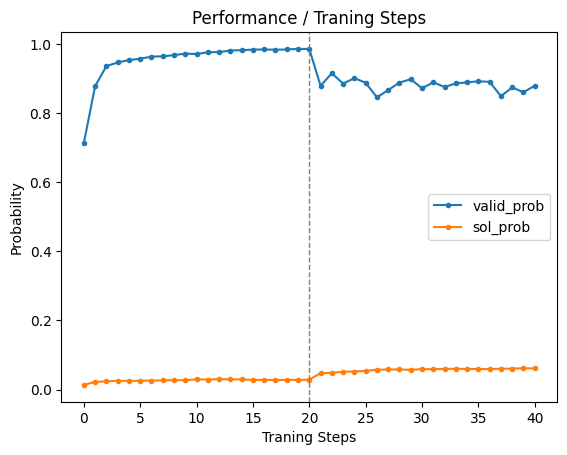

In [26]:
vp = np.concatenate((r1[2][:20],r2[2]))
sp = np.concatenate((r1[3][:20],r2[3]))
x = range(41)
plt.plot(x, vp, marker='.', label='valid_prob')
plt.plot(x, sp, marker='.', label='sol_prob')
plt.axvline(x=20,  color='gray', linestyle='--', linewidth=1)
plt.title('Performance / Traning Steps')
plt.xlabel('Traning Steps')
plt.ylabel('Probability')
plt.legend()